<h3>EDA and price predictions on BMW cars dataset</h3>

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"G:\machine_learning\bmw_dataset.csv")
dataset.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125.0,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,NaN,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160.0,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145.0,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,NaN,50.4,3.0


<h3>Data Profiling</h3><br>
1. Reviewing the datatypes and sample data to understand what types of data are we dealing with?<br>
2. Which variables to be transformed in some way before analyzing?

In [4]:
dataset.shape

(10781, 9)

In [5]:
dataset.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [6]:
dataset.describe(include = "all")

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10781,10781.000000,10781.000000,10781,10781.000000,10781,10773.000000,10781.000000,10781.000000
unique,24,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,3 Series,NaN,NaN,Semi-Auto,NaN,Diesel,NaN,NaN,NaN
freq,2443,NaN,NaN,4666,NaN,7027,NaN,NaN,NaN
mean,NaN,2017.078935,22733.408867,NaN,25496.986550,NaN,131.693122,56.399035,2.167767
std,NaN,2.349038,11415.528189,NaN,25143.192559,NaN,61.531706,31.336958,0.552054
min,NaN,1996.000000,1200.000000,NaN,1.000000,NaN,0.000000,5.500000,0.000000
25%,NaN,2016.000000,14950.000000,NaN,5529.000000,NaN,135.000000,45.600000,2.000000
50%,NaN,2017.000000,20462.000000,NaN,18347.000000,NaN,145.000000,53.300000,2.000000
75%,NaN,2019.000000,27940.000000,NaN,38206.000000,NaN,145.000000,62.800000,2.000000


In [7]:
dataset.isnull().sum().sort_values(ascending = False)

tax             8
engineSize      0
mpg             0
fuelType        0
mileage         0
transmission    0
price           0
year            0
model           0
dtype: int64

<b>Observations:</b>
   - Size of dataset:
     - 10781 x 9
   - Summary of data types in dataset:
     - Numeric: 6 columns
     - Object: 3 columns
   - 'tax' column has 8 missing values.
   - Unit of price is pounds

- <b>Replacing the missing values in tax column</b>

In [8]:
tax_mean = dataset['tax'].mean()
dataset['tax']=dataset['tax'].fillna(tax_mean)

In [9]:
dataset.isnull().sum().sort_values(ascending = False)

engineSize      0
mpg             0
tax             0
fuelType        0
mileage         0
transmission    0
price           0
year            0
model           0
dtype: int64

<h3>Exploratory Data Analysis</h3>

- <b> Distribution of car price</b>

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of price')

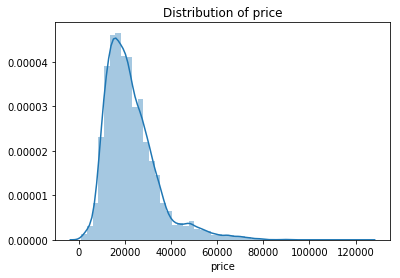

In [10]:
sns.distplot(dataset['price'])
plt.title('Distribution of price')

<b>Observation</b>
 - Most of the prices are with in the range of 10000 - 40000 pounds.

Text(0.5,1,'Transmission type categories with car price')

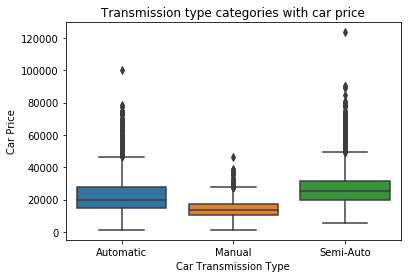

In [11]:
ax1 = sns.boxplot(x="transmission", y="price", data = dataset)
ax1.set_xlabel("Car Transmission Type")
ax1.set_ylabel("Car Price")
ax1.set_title("Transmission type categories with car price")

<b>Observations</b>
 - Semi-Auto cars have higher price than automatic cars. This might be due to the reason that cost of repairs and service for used automatic cars would be higher. To compensate for that, the used automatic cars were sold at less price than semi automatic.
 - Manual cars have lower price than automatic and semi-automatic cars.

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


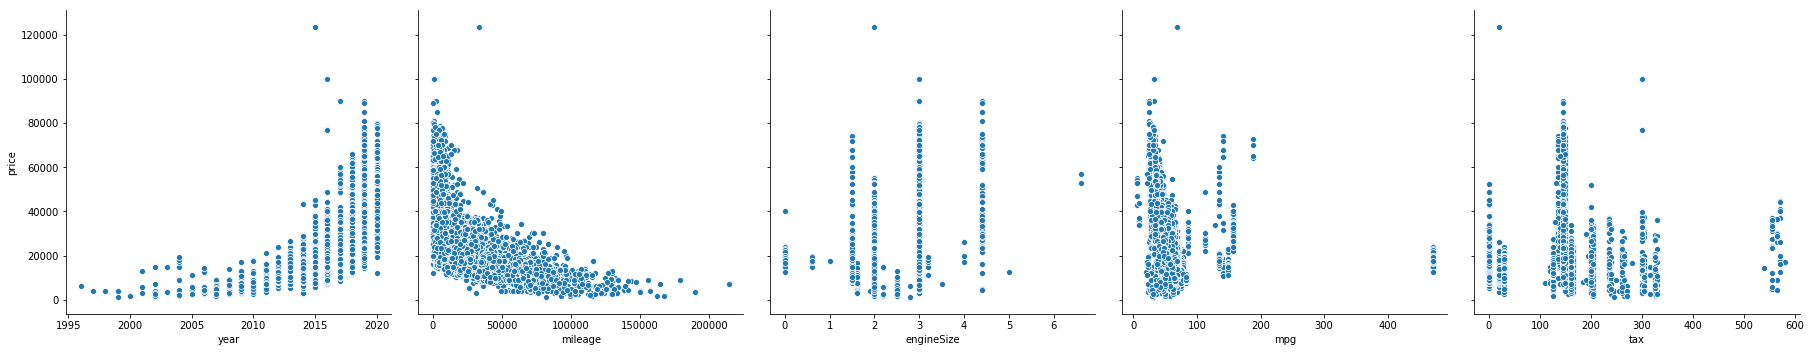

In [12]:
sns.pairplot(dataset, x_vars=['year','mileage','engineSize','mpg','tax'], y_vars='price',size=5, aspect=1, kind='scatter')

<b>Observations</b>
 - Year and Price are positively correlated. The more old cars are sold at lesser prices.
 - Miles travelled(mileage) and Price are negatively correlated. Cars which travelled more miles are sold at lesser price.

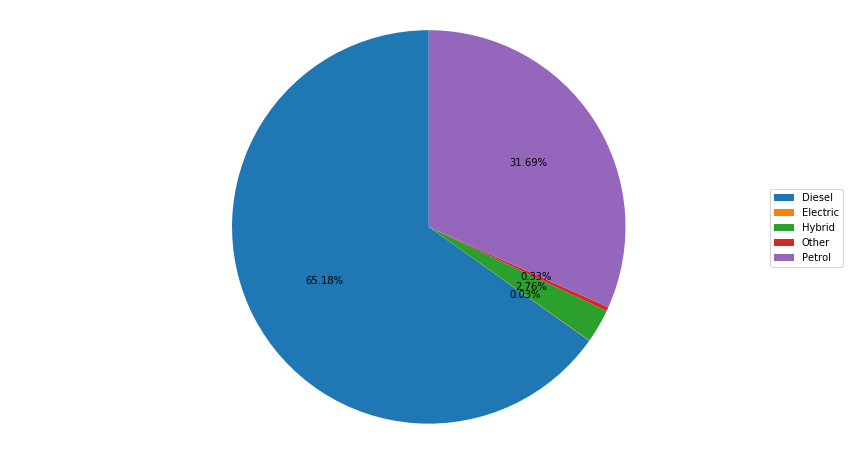

In [13]:
plt.figure(figsize=(15,8))
df = pd.DataFrame(dataset.groupby('fuelType')['price'].count())
fuelType = list(df.index)
price= list(df['price'])
pie = plt.pie(price,autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.legend( loc = 'right', labels=fuelType)
plt.show()

<b>Observations</b>
 - 65.18% of total cars sold were of diesel fuel type.
 - Hybrid, Electric and other type of cars were sold less in numbers.

[Text(0,0.5,'Count'), Text(0.5,0,'Car Model')]

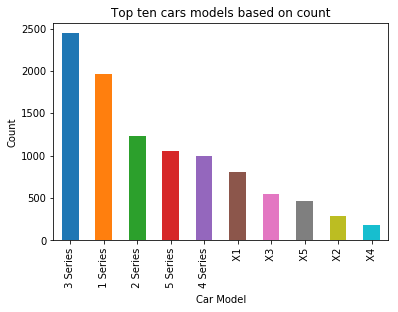

In [14]:
plt1 = dataset['model'].value_counts().sort_values(ascending=False).head(10).plot.bar(title='Top ten cars models based on count')
plt1.set(xlabel = 'Car Model', ylabel='Count')

<b>Observations</b>
 - '3 Series' car model were sold at high numbers when compared to other models

[Text(0,0.5,'Average Mileage'), Text(0.5,0,'Fuel Type')]

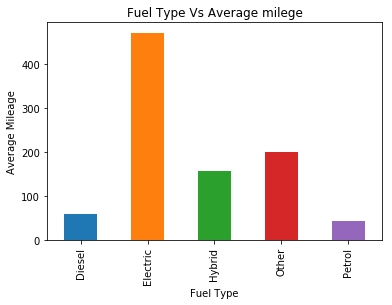

In [15]:
plt2 = dataset.groupby('fuelType')['mpg'].mean().plot.bar(title = 'Fuel Type Vs Average milege')
plt2.set(xlabel = 'Fuel Type', ylabel='Average Mileage')

<b>Observations</b>
 - 'Electric' fuel type cars gives high average mileage per gallon (around 470 miles).

[Text(0,0.5,'Fuel Type'), Text(0.5,0,'Average price')]

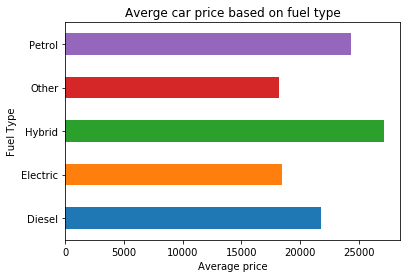

In [16]:
plt2 = dataset.groupby('fuelType')['price'].mean().plot.barh(title = 'Averge car price based on fuel type')
plt2.set(xlabel = 'Average price', ylabel='Fuel Type')

<b>Oservations</b>
 - Price of 'Hybrid' cars were higher than other types.

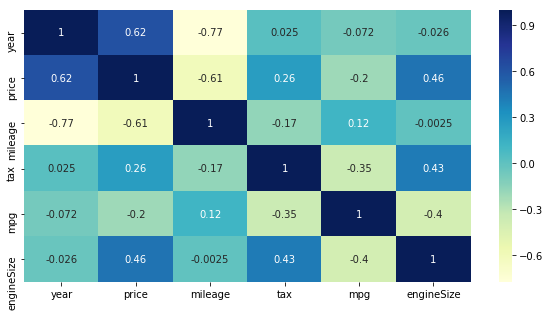

In [17]:
plt.figure(figsize = (10, 5))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

<b>Observations</b>
 - Year and mileage(miles travelled) are negatively correlated. So, The new model is likely to be travelled less miles.
 - Price and mileage(miles travelled) are negatively correlated.So, the price decreases as the miles travelled by car increases.
 - mileage per gallon and tax are negatively correlated. So, as the mpg of the car decrease, tax increases. Also, luxury cars tend to have less mpg. So, there might be a chance that luxury cars are leived higher taxes.
 - Price and year are positively correlated. So, the older the car, lesser the price is. 

<h3>Building Model to predict car prices</h3>

In [18]:
#Importing required libraries
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

In [19]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125.000000,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,131.693122,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160.000000,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145.000000,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,131.693122,50.4,3.0


In [20]:
ml_dataset = dataset

In [21]:
#Encoding the categorical columns
ml_dataset = pd.get_dummies(dataset, ['model','transmission','fuelType'], drop_first = True)
ml_dataset.head()

,year,price,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,125.000000,57.6,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2018,27000,14827,131.693122,42.8,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2016,16000,62794,160.000000,51.4,3.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,12750,26676,145.000000,72.4,1.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,14500,39554,131.693122,50.4,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
ml_dataset[["year","price","mileage","tax","mpg","engineSize"]] = scaler.fit_transform(ml_dataset[["year","price","mileage","tax","mpg","engineSize"]])
ml_dataset.head()

,year,price,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.750000,0.081796,0.313399,0.215517,0.111971,0.303030,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.916667,0.211033,0.069281,0.227057,0.080163,0.303030,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.833333,0.121057,0.293427,0.275862,0.098646,0.454545,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.875000,0.094474,0.124650,0.250000,0.143778,0.227273,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.750000,0.108788,0.184828,0.227057,0.096497,0.454545,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
ml_dataset.corr()

,year,price,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
year,1.000000,0.623756,-0.774382,0.025234,-0.071762,-0.026337,0.110087,-0.091860,0.054908,-0.027281,...,-0.193084,0.010498,-0.021549,0.003641,-0.244738,0.336549,-0.007663,0.041303,-0.010844,0.132844
price,0.623756,1.000000,-0.605397,0.263497,-0.204882,0.460196,-0.100367,-0.135266,-0.006564,-0.005658,...,-0.037753,0.037616,-0.022542,0.119342,-0.392430,0.354026,-0.006237,0.065526,-0.023019,0.097082
mileage,-0.774382,-0.605397,1.000000,-0.170881,0.118609,-0.002540,-0.120618,0.136956,-0.047058,0.068998,...,0.027192,-0.042728,0.013490,-0.013125,0.202986,-0.342767,-0.003697,-0.014059,0.044349,-0.243107
tax,0.025234,0.263497,-0.170881,1.000000,-0.351805,0.429605,-0.021816,-0.071848,0.005890,-0.029255,...,0.061462,0.070147,-0.096373,-0.033400,-0.223271,0.161923,-0.023516,-0.137594,-0.070345,0.321497
mpg,-0.071762,-0.204882,0.118609,-0.351805,1.000000,-0.399844,-0.006133,0.028743,-0.009033,0.059874,...,-0.018383,-0.059347,0.836867,0.102549,0.038181,-0.143505,0.220636,0.540628,0.264083,-0.293361
engineSize,-0.026337,0.460196,-0.002540,0.429605,-0.399844,1.000000,-0.191226,0.015029,0.043581,0.034447,...,-0.008406,-0.001550,-0.234636,-0.048073,-0.330941,0.172854,-0.055441,-0.137333,-0.051960,-0.019378
model_ 2 Series,0.110087,-0.100367,-0.120618,-0.021816,-0.006133,-0.191226,1.000000,-0.194160,-0.114377,-0.118200,...,-0.009143,-0.036083,-0.022699,-0.014255,0.085384,-0.010550,-0.005984,0.003612,-0.005585,0.162760
model_ 3 Series,-0.091860,-0.135266,0.136956,-0.071848,0.028743,0.015029,-0.194160,1.000000,-0.172600,-0.178368,...,-0.013797,-0.054450,-0.034253,-0.021511,-0.018110,0.007903,-0.009031,0.031723,0.049324,-0.098716
model_ 4 Series,0.054908,-0.006564,-0.047058,0.005890,-0.009033,0.043581,-0.114377,-0.172600,1.000000,-0.105074,...,-0.008128,-0.032076,-0.020178,-0.012672,-0.084140,0.042926,-0.005320,-0.053762,-0.018457,-0.001627
model_ 5 Series,-0.027281,-0.005658,0.068998,-0.029255,0.059874,0.034447,-0.118200,-0.178368,-0.105074,1.000000,...,-0.008399,-0.033148,-0.020853,-0.013096,-0.155811,0.039026,-0.005498,0.117651,-0.013665,-0.118503


In [24]:
#Splitting independent and dependent variables
X = ml_dataset.drop(['price','fuelType_Electric'],axis=1)
y = ml_dataset['price']

In [25]:
#Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

- <b>Linear Regression Model </b>

In [26]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred_train = linear_reg.predict(X_train) 
y_pred_test = linear_reg.predict(X_test)  

In [27]:
print('Performance Score(GB) for test dataset: %.1f ' %(linear_reg.score(X_test,y_test)*100))
print('Performance Score(GB) for train dataset: %.1f ' %(linear_reg.score(X_train,y_train)*100))

Performance Score(GB) for test dataset: 82.4 
Performance Score(GB) for train dataset: 87.9 


In [28]:
SS_Residual = sum((y_train-y_pred_train)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Adjusted R squared value for linear regression algorithm:", adjusted_r_squared)

Adjusted R squared value for linear regression algorithm: 0.8786788474752443


In [29]:
SS_Residual = sum((y_test-y_pred_test)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R squared value for linear regression (test dataset):", adjusted_r_squared)

Adjusted R squared value for linear regression (test dataset): 0.8208356278293527


E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Errors')

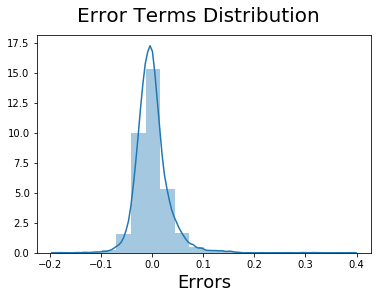

In [30]:
#To check if liner regression assumptions are true.(error terms has to be normally distributed)
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms Distribution', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

- <b> Applying cross validation technique to check efficiency of the Linear regression model</b>

In [31]:
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    linear_reg.fit(X_train, y_train)
    scores.append(linear_reg.score(X_test, y_test))
print("Finished")

Train Index:  [    0     1     2 ... 10776 10777 10778] 

Test Index:  [    3    14    31 ... 10750 10779 10780]
Train Index:  [    1     2     3 ... 10778 10779 10780] 

Test Index:  [    0     8    10 ... 10759 10770 10774]
Train Index:  [    0     1     2 ... 10778 10779 10780] 

Test Index:  [   12    17    20 ... 10722 10739 10751]
Train Index:  [    0     1     2 ... 10778 10779 10780] 

Test Index:  [   41    48    56 ... 10765 10771 10775]
Train Index:  [    0     1     2 ... 10778 10779 10780] 

Test Index:  [   15    26    27 ... 10738 10755 10768]
Train Index:  [    0     1     3 ... 10778 10779 10780] 

Test Index:  [    2    43    53 ... 10757 10760 10777]
Train Index:  [    0     1     2 ... 10778 10779 10780] 

Test Index:  [   25    32    42 ... 10772 10773 10776]
Train Index:  [    0     1     2 ... 10778 10779 10780] 

Test Index:  [    6     7    18 ... 10725 10747 10756]
Train Index:  [    0     2     3 ... 10777 10779 10780] 

Test Index:  [    1    11    13 ... 10

In [32]:
print(np.mean(scores))

0.8664714192156872


- <b> XGboost Model </b>

In [33]:
XGB=xgb.XGBRegressor(n_estimator = 10, random_state=0)
XGB.fit(X_train,y_train)
y_pred_train_xgb = XGB.predict(X_train) 
y_pred_test_xgb = XGB.predict(X_test)
print('Performance Score(GB) for test dataset: %.1f ' %(XGB.score(X_test,y_test)*100))
print('Performance Score(GB) for train dataset: %.1f ' %(XGB.score(X_train,y_train)*100))

[13:40:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Performance Score(GB) for test dataset: 95.7 
Performance Score(GB) for train dataset: 98.3 


In [34]:
SS_Residual = sum((y_train-y_pred_train_xgb)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Adjusted R squared value for xgboost algorithm (train dataset):", adjusted_r_squared)

Adjusted R squared value for xgboost algorithm (train dataset): 0.9825003766428249


In [35]:
SS_Residual = sum((y_test-y_pred_test_xgb)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R squared value for xgboost algorithm (test dataset):", adjusted_r_squared)

Adjusted R squared value for xgboost algorithm (test dataset): 0.9551256123724733


 - <b> Applying cross validation technique to check efficiency of the XG boost model</b>

In [36]:
scores_xgb = []
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    XGB.fit(X_train, y_train)
    scores_xgb.append(XGB.score(X_test, y_test))
print("Finished")

Train Index:  [    0     1     2 ... 10776 10777 10778] 

Test Index:  [    3    14    31 ... 10750 10779 10780]
[13:40:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train Index:  [    1     2     3 ... 10778 10779 10780] 

Test Index:  [    0     8    10 ... 10759 10770 10774]
[13:40:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases

In [37]:
print(np.mean(scores_xgb))

0.9465293756867539


<b>Conclusion</b>
 - Model has been developed to predict BMW car prices.
 - Xgboost alogrithm performs well than linear regression in our dataset.
 - Average accuracy of linear regression model is 86.6%
 - Average accuracy of xgboost model is 94.65%